In [1]:
#
import numpy as np
import matplotlib.pyplot as plt
import fitsio
import os
import sys

sys.path.insert(0, '/global/homes/q/qmxp55/DESI/bgstargets/py')

from io_ import get_sweep_whole, match_coord

# Load GAMA DR4

In [2]:
gama_ = fitsio.read('/global/cscratch1/sd/qmxp55/TilingCatv46.fits', ext=1)
# get only good quality gama objects
gama = gama_[(gama_['SURVEY_CLASS'] >= 4) & (gama_['NQ'] >= 3)]
print('fraction of gama good quality: %i / %i' %(len(gama), len(gama_)))

#get rid of stars in GAMA
Ngama = len(gama)
print('Percentage of Galaxies in GAMA Main Sample (z > 0.002): %.2f %%' %(100 * np.sum(gama['Z'] > 0.002)/Ngama))
print('Percentage of Stars in GAMA Main Sample (z < 0.002): %.2f %%' %(100 * np.sum(gama['Z'] < 0.002)/Ngama))

#
gama0 = gama #Include stars and galaxies in GAMA
gama = gama0[gama0['Z'] > 0.002] #Include only galaxies in GAMA


fraction of gama good quality: 186137 / 221373
Percentage of Galaxies in GAMA Main Sample (z > 0.002): 98.07 %
Percentage of Stars in GAMA Main Sample (z < 0.002): 1.93 %


# Load DR8 SWEEPS for GAMA footprint only (G12, G15, G09)

In [9]:
#
def gama12():
    
    return [174., 186., -3., 2.]

def gama15():
    
    return [211.5, 223.5, -2., 3.]

def gama09():
    
    return [129., 141., -2., 3.]

# load catalogue
# this is dr8 sweeps in decals with BGSBITS 


dr = 'dr8-south'
#dir where we are going to stored the results
pathdir = '/global/homes/q/qmxp55/DESI/bgs_main/bgs_main_%s_matches/' %(dr)
#if results dir does not exist, create it
ispathdir = os.path.isdir(pathdir)
if not ispathdir: os.mkdir(pathdir)
    
#get sweeps for GAMA footprint
lsin12 =  get_sweep_whole(patch=gama12(), dr=dr, rlimit=None, maskbitsource=False, bgsbits=True, opt='2')
lsin15 =  get_sweep_whole(patch=gama15(), dr=dr, rlimit=None, maskbitsource=False, bgsbits=True, opt='2')
lsin09 =  get_sweep_whole(patch=gama09(), dr=dr, rlimit=None, maskbitsource=False, bgsbits=True, opt='2')

# merge the SWEEPS in GAMA fileds targets in a single data frame
cat = np.concatenate((lsin12, lsin15, lsin09))


--------- OPTION 2 ---------


Progress...N/A%|                                                    |

/global/project/projectdirs/cosmo/data/legacysurvey/dr8/south/sweep/8.0/sweep-170m005-180p000.fits
/global/project/projectdirs/cosmo/data/legacysurvey/dr8/south/sweep/8.0/sweep-170p000-180p005.fits
/global/project/projectdirs/cosmo/data/legacysurvey/dr8/south/sweep/8.0/sweep-180m005-190p000.fits
/global/project/projectdirs/cosmo/data/legacysurvey/dr8/south/sweep/8.0/sweep-180p000-190p005.fits
Total bricks found: 	 4


Progress...100%|####################################################|

Total run time: 31.542136 sec


/global/homes/q/qmxp55/DESI/bgstargets/py/io_.py:589: RuntimeWarning: divide by zero encountered in log10
  mag = 22.5 - 2.5*np.log10(flux)
/global/homes/q/qmxp55/DESI/bgstargets/py/io_.py:589: RuntimeWarning: invalid value encountered in log10
  mag = 22.5 - 2.5*np.log10(flux)
/global/homes/q/qmxp55/DESI/bgstargets/py/cuts.py:159: RuntimeWarning: divide by zero encountered in log10
  mag = 22.5 - 2.5*np.log10(flux)
/global/homes/q/qmxp55/DESI/bgstargets/py/cuts.py:159: RuntimeWarning: invalid value encountered in log10
  mag = 22.5 - 2.5*np.log10(flux)
/global/homes/q/qmxp55/DESI/bgstargets/py/cuts.py:231: RuntimeWarning: divide by zero encountered in log10
  Grr = gaiagmag - 22.5 + 2.5*np.log10(fluxr)
/global/homes/q/qmxp55/DESI/bgstargets/py/cuts.py:231: RuntimeWarning: invalid value encountered in log10
  Grr = gaiagmag - 22.5 + 2.5*np.log10(fluxr)
/global/homes/q/qmxp55/DESI/bgstargets/py/cuts.py:233: RuntimeWarning: invalid value encountered in less
  GAIA_STAR &= (Grr  <  0.6) &

---- BGSMASK key: ---- 
	 BS, 0, 1
	 MS, 1, 2
	 GC, 2, 4
	 LG, 3, 8
	 allmask, 4, 16
	 nobs, 5, 32
	 SG, 6, 64
	 SGSV, 7, 128
	 FMC, 8, 256
	 FMC2, 9, 512
	 CC, 10, 1024
	 QC_FM, 11, 2048
	 QC_FI, 12, 4096
	 QC_FF, 13, 8192
	 QC_FM2, 14, 16384
	 QC_FI2, 15, 32768
	 QC_FF2, 16, 65536
	 QC_IVAR, 17, 131072


/global/homes/q/qmxp55/DESI/bgstargets/py/cuts.py:182: RuntimeWarning: invalid value encountered in less
  bgs_bright = (bgs) & (rmag < 19.5)
/global/homes/q/qmxp55/DESI/bgstargets/py/cuts.py:183: RuntimeWarning: invalid value encountered in greater
  bgs_faint = (bgs) & (rmag > 19.5) & (rmag < 20.0)
/global/homes/q/qmxp55/DESI/bgstargets/py/cuts.py:183: RuntimeWarning: invalid value encountered in less
  bgs_faint = (bgs) & (rmag > 19.5) & (rmag < 20.0)
/global/homes/q/qmxp55/DESI/bgstargets/py/cuts.py:220: RuntimeWarning: invalid value encountered in less
  bgs_sv_bright = (bgs_sv) & (rmag < 19.5)
/global/homes/q/qmxp55/DESI/bgstargets/py/cuts.py:221: RuntimeWarning: invalid value encountered in greater_equal
  bgs_sv_faint = (bgs_sv) & (rmag >= 19.5) & (rmag < 20.1)
/global/homes/q/qmxp55/DESI/bgstargets/py/cuts.py:221: RuntimeWarning: invalid value encountered in less
  bgs_sv_faint = (bgs_sv) & (rmag >= 19.5) & (rmag < 20.1)
/global/homes/q/qmxp55/DESI/bgstargets/py/cuts.py:222: R

	 bgs_any, 20, 1048576
	 bgs_bright, 21, 2097152
	 bgs_faint, 22, 4194304
	 bgs_sv_any, 30, 1073741824
	 bgs_sv_bright, 31, 2147483648
	 bgs_sv_faint, 32, 4294967296
	 bgs_sv_faint_ext, 33, 8589934592
	 bgs_sv_fibmag, 34, 17179869184
	 bgs_sv_lowq, 35, 34359738368
---- Sanity Check ---- 
	 BS, 4572639, 4572639
	 MS, 4519463, 4519463
	 GC, 4655548, 4655548
	 LG, 4652537, 4652537
	 allmask, 4637094, 4637094
	 nobs, 4650499, 4650499
	 SG, 4451736, 4451736
	 SGSV, 4452439, 4452439
	 FMC, 4633586, 4633586
	 FMC2, 4634254, 4634254
	 CC, 4450208, 4450208
	 QC_FM, 4616786, 4616786
	 QC_FI, 4649039, 4649039
	 QC_FF, 4627223, 4627223
	 QC_FM2, 4642366, 4642366
	 QC_FI2, 4653899, 4653899
	 QC_FF2, 4648672, 4648672
	 QC_IVAR, 4652108, 4652108
	 bgs_any, 87527, 87527
	 bgs_bright, 51762, 51762
	 bgs_faint, 35765, 35765
	 bgs_sv_any, 149230, 149230
	 bgs_sv_bright, 52093, 52093
	 bgs_sv_faint, 45441, 45441
	 bgs_sv_faint_ext, 38045, 38045
	 bgs_sv_fibmag, 11443, 11443
	 bgs_sv_lowq, 2208, 2208
/glob

Progress...N/A%|                                                    |

Total run time: 80.095720 sec
--------- OPTION 2 ---------
/global/project/projectdirs/cosmo/data/legacysurvey/dr8/south/sweep/8.0/sweep-210m005-220p000.fits
/global/project/projectdirs/cosmo/data/legacysurvey/dr8/south/sweep/8.0/sweep-210p000-220p005.fits
/global/project/projectdirs/cosmo/data/legacysurvey/dr8/south/sweep/8.0/sweep-220m005-230p000.fits
/global/project/projectdirs/cosmo/data/legacysurvey/dr8/south/sweep/8.0/sweep-220p000-230p005.fits
Total bricks found: 	 4


Progress...100%|####################################################|

Total run time: 34.815731 sec
---- BGSMASK key: ---- 
	 BS, 0, 1
	 MS, 1, 2
	 GC, 2, 4
	 LG, 3, 8
	 allmask, 4, 16
	 nobs, 5, 32
	 SG, 6, 64
	 SGSV, 7, 128
	 FMC, 8, 256
	 FMC2, 9, 512
	 CC, 10, 1024
	 QC_FM, 11, 2048
	 QC_FI, 12, 4096
	 QC_FF, 13, 8192
	 QC_FM2, 14, 16384
	 QC_FI2, 15, 32768
	 QC_FF2, 16, 65536
	 QC_IVAR, 17, 131072
	 bgs_any, 20, 1048576
	 bgs_bright, 21, 2097152
	 bgs_faint, 22, 4194304
	 bgs_sv_any, 30, 1073741824
	 bgs_sv_bright, 31, 2147483648
	 bgs_sv_faint, 32, 4294967296
	 bgs_sv_faint_ext, 33, 8589934592
	 bgs_sv_fibmag, 34, 17179869184
	 bgs_sv_lowq, 35, 34359738368
---- Sanity Check ---- 
	 BS, 4840705, 4840705
	 MS, 4767024, 4767024
	 GC, 4944337, 4944337
	 LG, 4941178, 4941178
	 allmask, 4921628, 4921628
	 nobs, 4940768, 4940768
	 SG, 4651266, 4651266
	 SGSV, 4651921, 4651921
	 FMC, 4921643, 4921643
	 FMC2, 4922412, 4922412
	 CC, 4725960, 4725960
	 QC_FM, 4892983, 4892983
	 QC_FI, 4939677, 4939677
	 QC_FF, 4909311, 4909311
	 QC_FM2, 4928293, 4928293
	 QC_

Progress...N/A%|                                                    |

Total run time: 81.901674 sec
--------- OPTION 2 ---------
/global/project/projectdirs/cosmo/data/legacysurvey/dr8/south/sweep/8.0/sweep-120m005-130p000.fits
/global/project/projectdirs/cosmo/data/legacysurvey/dr8/south/sweep/8.0/sweep-120p000-130p005.fits
/global/project/projectdirs/cosmo/data/legacysurvey/dr8/south/sweep/8.0/sweep-130m005-140p000.fits
/global/project/projectdirs/cosmo/data/legacysurvey/dr8/south/sweep/8.0/sweep-130p000-140p005.fits
/global/project/projectdirs/cosmo/data/legacysurvey/dr8/south/sweep/8.0/sweep-140m005-150p000.fits
/global/project/projectdirs/cosmo/data/legacysurvey/dr8/south/sweep/8.0/sweep-140p000-150p005.fits
Total bricks found: 	 6


Progress...100%|####################################################|

Total run time: 45.919606 sec
---- BGSMASK key: ---- 
	 BS, 0, 1
	 MS, 1, 2
	 GC, 2, 4
	 LG, 3, 8
	 allmask, 4, 16
	 nobs, 5, 32
	 SG, 6, 64
	 SGSV, 7, 128
	 FMC, 8, 256
	 FMC2, 9, 512
	 CC, 10, 1024
	 QC_FM, 11, 2048
	 QC_FI, 12, 4096
	 QC_FF, 13, 8192
	 QC_FM2, 14, 16384
	 QC_FI2, 15, 32768
	 QC_FF2, 16, 65536
	 QC_IVAR, 17, 131072
	 bgs_any, 20, 1048576
	 bgs_bright, 21, 2097152
	 bgs_faint, 22, 4194304
	 bgs_sv_any, 30, 1073741824
	 bgs_sv_bright, 31, 2147483648
	 bgs_sv_faint, 32, 4294967296
	 bgs_sv_faint_ext, 33, 8589934592
	 bgs_sv_fibmag, 34, 17179869184
	 bgs_sv_lowq, 35, 34359738368
---- Sanity Check ---- 
	 BS, 4774710, 4774710
	 MS, 4637904, 4637904
	 GC, 4945759, 4945759
	 LG, 4943764, 4943764
	 allmask, 4915202, 4915202
	 nobs, 4945343, 4945343
	 SG, 4550334, 4550334
	 SGSV, 4551188, 4551188
	 FMC, 4923813, 4923813
	 FMC2, 4924422, 4924422
	 CC, 4724403, 4724403
	 QC_FM, 4871915, 4871915
	 QC_FI, 4944134, 4944134
	 QC_FF, 4901259, 4901259
	 QC_FM2, 4913048, 4913048
	 QC_

# Match catalogues

In [10]:
#
def match(gama=None, cat=None):
    
    # matching LS8 with gama stars and galaxies
    idx2, idx1, d2d, d_ra, d_dec = match_coord(cat['RA'], cat['DEC'], 
                                                                gama['RA'], gama['DEC'], search_radius=1)

    # LS DR8 matched with gama
    dr8_gama = np.zeros_like(cat['RA'], dtype='?') #dr8 that match with gama
    dr8_z = np.full_like(cat['RA'], -1) #z from gama

    dr8_gama[idx2.tolist()] = True
    dr8_z[idx2.tolist()] = gama['Z'][idx1]
    
    return dr8_gama, dr8_z


In [11]:
#
dr8_gama, dr8_z = match(gama, cat)
#get BGS targets
bgs = ((cat['BGSBITS'] & 2**(20)) != 0) #| (L2) #adding the LSLGA galaxies
print('fraction of bgs in %s within GAMA: %i / %i' %(dr, np.sum(bgs), len(cat)))


Doubly matched objects = 2
Final matched objects = 181919
fraction of bgs in dr8-south within GAMA: 256973 / 14545644


mean: 	 0.2243 (all) 	 0.2155 (bright) 	 0.2653 (faint)


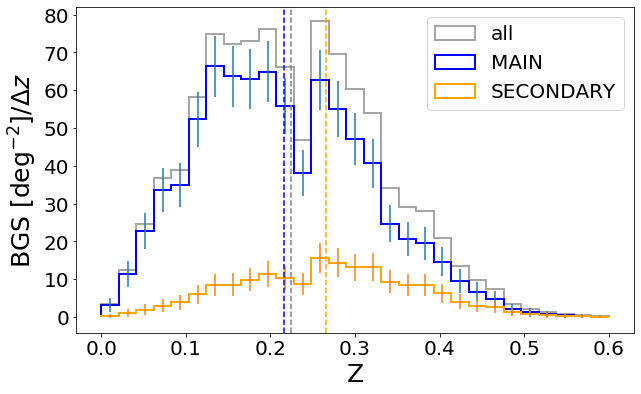

In [28]:
#
fig = plt.figure(figsize=(10,6))

N = np.sum((dr8_gama) & (bgs))
cumu = False
Ared = 175

mask = (dr8_gama) & (dr8_z > 0) & (dr8_z < 0.8) & (bgs)
maskB = (dr8_gama) & (dr8_z > 0) & (dr8_z < 0.8) & (cat['RMAG'] < 19.5) & (bgs)
maskF = (dr8_gama) & (dr8_z > 0) & (dr8_z < 0.8) & (cat['RMAG'] > 19.5) & (cat['RMAG'] < 20.) & (bgs)
bins = np.linspace(0,0.6,30)

#plt.title(r'BGS cross-matched with GAMA DR3', size=18)
h,e,p = plt.hist(dr8_z[mask], bins=bins,  weights=np.full(np.sum(mask), 1/Ared), histtype='step', cumulative=cumu, lw=2, color='gray', alpha=0.7, label='all')
hB,eB,pB = plt.hist(dr8_z[maskB], bins=bins,  weights=np.full(np.sum(maskB), 1/Ared), histtype='step', cumulative=cumu, lw=2, color='blue', label='MAIN')
hF,eF,pF = plt.hist(dr8_z[maskF], bins=bins,  weights=np.full(np.sum(maskF), 1/Ared), histtype='step', cumulative=cumu, lw=2, color='orange', label='SECONDARY')

#
plt.errorbar((eB[1:]+eB[:-1])/2., hB, np.sqrt(hB), fmt='none')
plt.errorbar((eF[1:]+eF[:-1])/2., hF, np.sqrt(hF), fmt='none')

print('mean: \t %.4f (all) \t %.4f (bright) \t %.4f (faint)' %(
    np.mean(dr8_z[mask]), np.mean(dr8_z[maskB]), np.mean(dr8_z[maskF])
    ))
plt.axvline(np.mean(dr8_z[mask]), ls='--', c='gray')
plt.axvline(np.mean(dr8_z[maskB]), ls='--', c='blue')
plt.axvline(np.mean(dr8_z[maskF]), ls='--', c='orange')

#plt.hist(dr8_z[(maskB) & (bgs)], bins=bins,  weights=np.full(np.sum((maskB) & (bgs)), 1/N), histtype='step', cumulative=cumu, lw=2, ls='--', color='blue')
#plt.hist(dr8_z[(maskF) & (bgs)], bins=bins,  weights=np.full(np.sum((maskF) & (bgs)), 1/N), histtype='step', cumulative=cumu, lw=2, ls='--', color='orange')
plt.xlabel(r'Z', size=25)
plt.ylabel(r'BGS [deg$^{-2}$]/$\Delta z$', size=25)
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

file = pathdir+'bgs_nz'
fig.savefig(file+'.png', bbox_inches = 'tight', pad_inches = 0, dpi=300)


In [29]:
0.6/30

0.02